In [50]:
import pandas as pd
import numpy as np 
import plotly.express as px
import os
import matplotlib.pyplot as plt

In [51]:
current_directory = os.getcwd()
customer_data = pd.ExcelFile(f'{current_directory}\\Customer_Churn_Data_Large.xlsx')
customer_data

In [52]:
customer_demographics  = pd.read_excel(customer_data, 'Customer_Demographics')
customer_demographics

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [53]:
transaction_history  = pd.read_excel(customer_data, 'Transaction_History')
transaction_history

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing
...,...,...,...,...,...
5049,1000,2724,2022-09-08,232.06,Groceries
5050,1000,2917,2022-12-13,324.98,Books
5051,1000,2979,2022-06-15,375.34,Groceries
5052,1000,8594,2022-04-08,166.73,Books


In [54]:
customer_service = pd.read_excel(customer_data, 'Customer_Service')
customer_service

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved
...,...,...,...,...,...
997,990,3671,2022-10-25,Complaint,Unresolved
998,992,2114,2022-09-29,Feedback,Unresolved
999,994,3087,2022-07-02,Complaint,Unresolved
1000,994,8508,2022-05-14,Complaint,Unresolved


In [55]:
online_activity = pd.read_excel(customer_data, 'Online_Activity')
online_activity

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website
...,...,...,...,...
995,996,2023-01-29,38,Mobile App
996,997,2023-04-01,5,Mobile App
997,998,2023-07-10,47,Website
998,999,2023-01-08,23,Website


In [56]:
churn_status = pd.read_excel(customer_data, 'Churn_Status')
churn_status

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,0


In [57]:
customer_demographics.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,500.500000,43.267000
std,288.819436,15.242311
min,1.000000,18.000000
25%,250.750000,30.000000
50%,500.500000,43.000000
75%,750.250000,56.000000
max,1000.000000,69.000000


In [58]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [59]:
customer_demographics.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

In [60]:
transaction_history.describe()

,CustomerID,TransactionID,TransactionDate,AmountSpent
count,5054.000000,5054.000000,5054,5054.000000
mean,501.424218,5510.538979,2022-07-01 19:25:37.158686208,250.707351
min,1.000000,1000.000000,2022-01-01 00:00:00,5.180000
25%,251.000000,3242.000000,2022-04-03 00:00:00,127.105000
50%,506.000000,5530.000000,2022-07-01 00:00:00,250.525000
75%,749.000000,7680.750000,2022-09-29 00:00:00,373.412500
max,1000.000000,9997.000000,2022-12-31 00:00:00,499.860000
std,285.172780,2582.088012,NaN,142.250838


In [61]:
transaction_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB


In [62]:
transaction_history.isnull().sum()

CustomerID         0
TransactionID      0
TransactionDate    0
AmountSpent        0
ProductCategory    0
dtype: int64

In [63]:
transaction_history.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [64]:
transaction_history.nunique()

CustomerID         1000
TransactionID      3864
TransactionDate     365
AmountSpent        4797
ProductCategory       5
dtype: int64

In [65]:
customer_service.describe()

,CustomerID,InteractionID,InteractionDate
count,1002.000000,1002.000000,1002
mean,485.209581,5952.887226,2022-07-02 19:28:22.994011904
min,1.000000,2015.000000,2022-01-01 00:00:00
25%,238.250000,3991.500000,2022-04-07 00:00:00
50%,474.500000,5911.500000,2022-07-02 12:00:00
75%,735.750000,7908.250000,2022-09-30 00:00:00
max,995.000000,9997.000000,2022-12-30 00:00:00
std,287.030259,2305.819681,NaN


In [66]:
customer_service.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [67]:
customer_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1002 non-null   int64         
 1   InteractionID     1002 non-null   int64         
 2   InteractionDate   1002 non-null   datetime64[ns]
 3   InteractionType   1002 non-null   object        
 4   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ KB


In [68]:
customer_service.isnull().sum()

CustomerID          0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
dtype: int64

In [69]:
customer_service['InteractionMonth'] = customer_service['InteractionDate'].dt.month_name()

monthly_counts = (
    customer_service
    .groupby(['InteractionType', 'InteractionMonth'])
    .size()
    .sort_index()
    .unstack(fill_value=0)
)

monthly_line_df = pd.DataFrame(monthly_counts)

monthly_line_df.sort_index(inplace=True)
monthly_line_df = monthly_line_df.reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'], 
    axis=1
)   
monthly_line_df.reset_index(inplace=True)
monthly_line_df

InteractionMonth,InteractionType,January,February,March,April,May,June,July,August,September,October,November,December
0,Complaint,25,22,31,25,41,32,33,26,28,32,27,13
1,Feedback,27,26,36,32,20,31,42,28,33,31,25,29
2,Inquiry,25,20,26,23,26,24,22,28,21,26,32,34


In [70]:
monthly_line_long = monthly_line_df.melt(id_vars='InteractionType', var_name='Month', value_name='Count')

monthly_line_long['Month'] = monthly_line_long['Month']

# Sort for proper line plot rendering
monthly_line_long = monthly_line_long.sort_index()

# Plot the line chart
fig = px.line(
    monthly_line_long,
    x='Month',
    y='Count',
    color='InteractionType',
    markers=True,
    title='Monthly Customer Service Interactions by Type',
    labels={'Month': 'Month', 'Count': 'Number of Interactions'}
)

fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()

In [71]:
online_activity.describe()

,CustomerID,LastLoginDate,LoginFrequency
count,1000.000000,1000,1000.000000
mean,500.500000,2023-07-05 21:28:48,25.912000
min,1.000000,2023-01-01 00:00:00,1.000000
25%,250.750000,2023-04-08 00:00:00,13.750000
50%,500.500000,2023-07-10 12:00:00,27.000000
75%,750.250000,2023-10-01 06:00:00,38.000000
max,1000.000000,2023-12-31 00:00:00,49.000000
std,288.819436,NaN,14.055953


In [72]:
online_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


In [73]:
churn_status.describe()

,CustomerID,ChurnStatus
count,1000.000000,1000.000000
mean,500.500000,0.204000
std,288.819436,0.403171
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,0.000000
75%,750.250000,0.000000
max,1000.000000,1.000000


In [74]:
churn_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [75]:
churn_status.isnull().sum()

CustomerID     0
ChurnStatus    0
dtype: int64

I am now going to start cleaning the data and select features for the EDA and machine learning process

In [76]:
#get the transaction history as to how long since their last transaction

first_customer_transaction = transaction_history.groupby('CustomerID')['TransactionDate'].min().reset_index()
first_customer_transaction.rename(columns={'TransactionDate': 'FirstTransactionDate'}, inplace=True)
first_customer_transaction


,CustomerID,FirstTransactionDate
0,1,2022-03-27
1,2,2022-01-09
2,3,2022-02-11
3,4,2022-05-22
4,5,2022-02-21
...,...,...
995,996,2022-07-24
996,997,2022-08-06
997,998,2022-09-18
998,999,2022-01-20


In [77]:
last_customer_transaction = transaction_history.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_customer_transaction.rename(columns={'TransactionDate': 'LastTransactionDate'}, inplace=True)
last_customer_transaction

,CustomerID,LastTransactionDate
0,1,2022-03-27
1,2,2022-11-19
2,3,2022-10-08
3,4,2022-12-27
4,5,2022-12-21
...,...,...
995,996,2022-07-24
996,997,2022-10-25
997,998,2022-09-18
998,999,2022-12-07


In [78]:
total_amount_spent = transaction_history.groupby('CustomerID')['AmountSpent'].sum().reset_index()
total_amount_spent.rename(columns={'AmountSpent': 'TotalAmountSpent'}, inplace=True)
total_amount_spent

,CustomerID,TotalAmountSpent
0,1,416.50
1,2,1547.42
2,3,1702.98
3,4,917.29
4,5,2001.49
...,...,...
995,996,227.25
996,997,419.82
997,998,252.15
998,999,2393.26


In [79]:
first_interaction_date = customer_service.groupby('CustomerID')['InteractionDate'].min().reset_index()
first_interaction_date.rename(columns={'InteractionDate': 'FirstInteractionDate'}, inplace=True)
first_interaction_date

,CustomerID,FirstInteractionDate
0,1,2022-03-31
1,2,2022-03-17
2,3,2022-08-24
3,4,2022-07-03
4,6,2022-05-05
...,...,...
663,989,2022-08-03
664,990,2022-09-17
665,992,2022-09-29
666,994,2022-05-14


In [80]:
last_interaction_date = customer_service.groupby('CustomerID')['InteractionDate'].max().reset_index()
last_interaction_date.rename(columns={'InteractionDate': 'LastInteractionDate'}, inplace=True)
last_interaction_date

,CustomerID,LastInteractionDate
0,1,2022-03-31
1,2,2022-03-17
2,3,2022-08-24
3,4,2022-11-18
4,6,2022-05-05
...,...,...
663,989,2022-10-07
664,990,2022-10-25
665,992,2022-09-29
666,994,2022-07-02


In [81]:
total_service_interactions = customer_service.groupby('CustomerID')['InteractionType'].count().reset_index()
total_service_interactions.rename(columns={'InteractionType': 'TotalServiceInteractions'}, inplace=True)

In [82]:
# Count of online actions
online_activity_count = online_activity[['CustomerID', 'LoginFrequency']].drop_duplicates('CustomerID')
transaction_count_per_customer = (
    transaction_history
    .groupby('CustomerID')
    .size()
    .reset_index(name='TransactionCount')
)

# Most recent login date
last_login_df = (
    online_activity
    .groupby('CustomerID')['LastLoginDate']
    .max()
    .reset_index(name='LastLoginDate')
)

In [83]:
user_platform = online_activity.groupby('CustomerID')['ServiceUsage'].first().reset_index()
user_platform.rename(columns={'ServiceUsage': 'ServiceUsage'}, inplace=True) # This is redundant if the name is the same
user_platform

,CustomerID,ServiceUsage
0,1,Mobile App
1,2,Website
2,3,Website
3,4,Website
4,5,Website
...,...,...
995,996,Mobile App
996,997,Mobile App
997,998,Website
998,999,Website


In [84]:

df = customer_demographics.merge(
    first_customer_transaction, on='CustomerID', how='left'
    ).merge(
        last_customer_transaction, on='CustomerID', how='left'
    ).merge(
        total_amount_spent, on='CustomerID', how='left'
    ).merge(
        first_interaction_date, on='CustomerID', how='left'
    ).merge(
        last_interaction_date, on='CustomerID', how='left'
    ).merge(
        total_service_interactions, on='CustomerID', how='left'
    ).merge(
        online_activity_count, on='CustomerID', how='left'
    ).merge(
        transaction_count_per_customer, on='CustomerID', how='left'
    ).merge(
        last_login_df, on='CustomerID', how='left'
    ).merge(
        churn_status, on='CustomerID', how='left'
    ).merge(
        user_platform, on='CustomerID', how='left'
    
)

df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,FirstTransactionDate,LastTransactionDate,TotalAmountSpent,FirstInteractionDate,LastInteractionDate,TotalServiceInteractions,LoginFrequency,TransactionCount,LastLoginDate,ChurnStatus,ServiceUsage
0,1,62,M,Single,Low,2022-03-27,2022-03-27,416.50,2022-03-31,2022-03-31,1.0,34,1,2023-10-21,0,Mobile App
1,2,65,M,Married,Low,2022-01-09,2022-11-19,1547.42,2022-03-17,2022-03-17,1.0,5,7,2023-12-05,1,Website
2,3,18,M,Single,Low,2022-02-11,2022-10-08,1702.98,2022-08-24,2022-08-24,1.0,3,6,2023-11-15,0,Website
3,4,21,M,Widowed,Low,2022-05-22,2022-12-27,917.29,2022-07-03,2022-11-18,2.0,2,5,2023-08-25,0,Website
4,5,21,M,Divorced,Medium,2022-02-21,2022-12-21,2001.49,NaT,NaT,NaN,41,8,2023-10-27,0,Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,F,Single,Low,2022-07-24,2022-07-24,227.25,NaT,NaT,NaN,38,1,2023-01-29,0,Mobile App
996,997,19,M,Widowed,High,2022-08-06,2022-10-25,419.82,NaT,NaT,NaN,5,2,2023-04-01,0,Mobile App
997,998,47,M,Married,Low,2022-09-18,2022-09-18,252.15,NaT,NaT,NaN,47,1,2023-07-10,0,Website
998,999,23,M,Widowed,High,2022-01-20,2022-12-07,2393.26,NaT,NaT,NaN,23,9,2023-01-08,0,Website


In [85]:
df['FirstTransactionDate'] = pd.to_datetime(df['FirstTransactionDate'])
df['LastTransactionDate'] = pd.to_datetime(df['LastTransactionDate'])
# repeat for all date columns
df['FirstInteractionDate'] = pd.to_datetime(df['FirstInteractionDate'])
df['LastInteractionDate'] = pd.to_datetime(df['LastInteractionDate'])

In [86]:
df.isnull().sum()

CustomerID                    0
Age                           0
Gender                        0
MaritalStatus                 0
IncomeLevel                   0
FirstTransactionDate          0
LastTransactionDate           0
TotalAmountSpent              0
FirstInteractionDate        332
LastInteractionDate         332
TotalServiceInteractions    332
LoginFrequency                0
TransactionCount              0
LastLoginDate                 0
ChurnStatus                   0
ServiceUsage                  0
dtype: int64

In [87]:
df.fillna(
    {
        'FirstInteractionDate': df['LastLoginDate'].median(),
        'LastInteractionDate': df['LastLoginDate'].median(),
        'TotalServiceInteractions': 0
    }, 
    inplace=True
)

df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,FirstTransactionDate,LastTransactionDate,TotalAmountSpent,FirstInteractionDate,LastInteractionDate,TotalServiceInteractions,LoginFrequency,TransactionCount,LastLoginDate,ChurnStatus,ServiceUsage
0,1,62,M,Single,Low,2022-03-27,2022-03-27,416.50,2022-03-31 00:00:00,2022-03-31 00:00:00,1.0,34,1,2023-10-21,0,Mobile App
1,2,65,M,Married,Low,2022-01-09,2022-11-19,1547.42,2022-03-17 00:00:00,2022-03-17 00:00:00,1.0,5,7,2023-12-05,1,Website
2,3,18,M,Single,Low,2022-02-11,2022-10-08,1702.98,2022-08-24 00:00:00,2022-08-24 00:00:00,1.0,3,6,2023-11-15,0,Website
3,4,21,M,Widowed,Low,2022-05-22,2022-12-27,917.29,2022-07-03 00:00:00,2022-11-18 00:00:00,2.0,2,5,2023-08-25,0,Website
4,5,21,M,Divorced,Medium,2022-02-21,2022-12-21,2001.49,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,41,8,2023-10-27,0,Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,F,Single,Low,2022-07-24,2022-07-24,227.25,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,38,1,2023-01-29,0,Mobile App
996,997,19,M,Widowed,High,2022-08-06,2022-10-25,419.82,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,5,2,2023-04-01,0,Mobile App
997,998,47,M,Married,Low,2022-09-18,2022-09-18,252.15,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,47,1,2023-07-10,0,Website
998,999,23,M,Widowed,High,2022-01-20,2022-12-07,2393.26,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,23,9,2023-01-08,0,Website


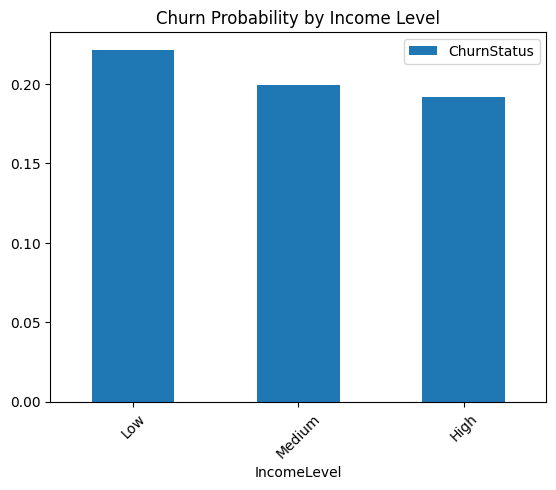

In [88]:
#this shows that lower income levels are more likely to churn
churn_probability_by_income = df.groupby('IncomeLevel')['ChurnStatus'].mean().reset_index().sort_values(by='ChurnStatus', ascending=False)
churn_probability_by_income.plot(kind='bar', x='IncomeLevel', y='ChurnStatus', title='Churn Probability by Income Level')
plt.xticks(rotation=45)
plt.show()

In [89]:
df = pd.get_dummies(df, columns=['MaritalStatus','Gender','IncomeLevel', 'ServiceUsage'])
df

,CustomerID,Age,FirstTransactionDate,LastTransactionDate,TotalAmountSpent,FirstInteractionDate,LastInteractionDate,TotalServiceInteractions,LoginFrequency,TransactionCount,...,MaritalStatus_Single,MaritalStatus_Widowed,Gender_F,Gender_M,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Mobile App,ServiceUsage_Online Banking,ServiceUsage_Website
0,1,62,2022-03-27,2022-03-27,416.50,2022-03-31 00:00:00,2022-03-31 00:00:00,1.0,34,1,...,True,False,False,True,False,True,False,True,False,False
1,2,65,2022-01-09,2022-11-19,1547.42,2022-03-17 00:00:00,2022-03-17 00:00:00,1.0,5,7,...,False,False,False,True,False,True,False,False,False,True
2,3,18,2022-02-11,2022-10-08,1702.98,2022-08-24 00:00:00,2022-08-24 00:00:00,1.0,3,6,...,True,False,False,True,False,True,False,False,False,True
3,4,21,2022-05-22,2022-12-27,917.29,2022-07-03 00:00:00,2022-11-18 00:00:00,2.0,2,5,...,False,True,False,True,False,True,False,False,False,True
4,5,21,2022-02-21,2022-12-21,2001.49,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,41,8,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,2022-07-24,2022-07-24,227.25,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,38,1,...,True,False,True,False,False,True,False,True,False,False
996,997,19,2022-08-06,2022-10-25,419.82,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,5,2,...,False,True,False,True,True,False,False,True,False,False
997,998,47,2022-09-18,2022-09-18,252.15,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,47,1,...,False,False,False,True,False,True,False,False,False,True
998,999,23,2022-01-20,2022-12-07,2393.26,2023-07-10 12:00:00,2023-07-10 12:00:00,0.0,23,9,...,False,True,False,True,True,False,False,False,False,True


In [90]:
ARPU = df['TotalAmountSpent'].sum()/df['CustomerID'].count()
print(f'The Average Revenue Per User is: {ARPU:.2f}')

The Average Revenue Per User is: 1267.07


In [91]:
df[['TotalServiceInteractions', 'LoginFrequency', 'TransactionCount']].mean()

TotalServiceInteractions     1.002
LoginFrequency              25.912
TransactionCount             5.054
dtype: float64

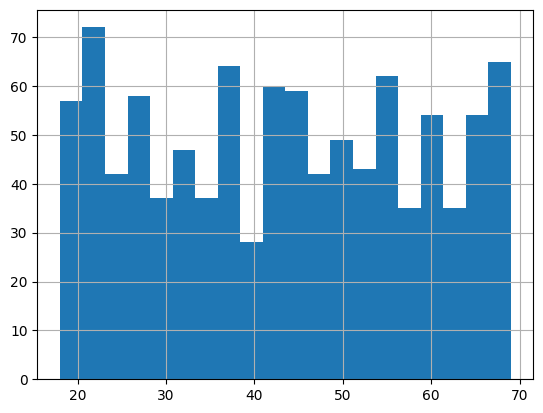

In [92]:
df['Age'].hist(bins=20)
plt.show()

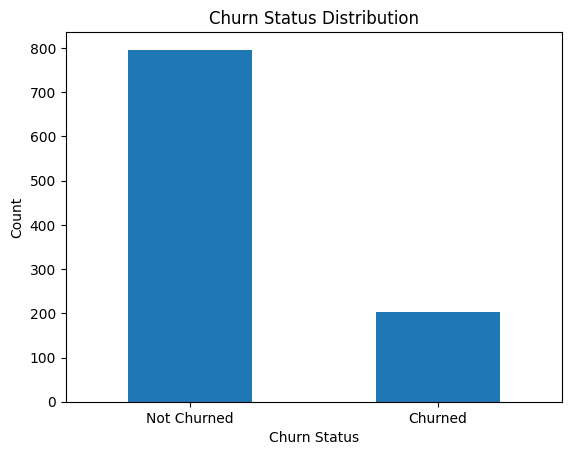

In [93]:
ax = df['ChurnStatus'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Not Churned', 'Churned'], rotation=0)
plt.title('Churn Status Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')

plt.show()


In [94]:
# this shows that total amount spent is not a good indicator of churn status
px.box(df, x='ChurnStatus', y='TotalAmountSpent', title='Total Amount Spent by Churn Status')

In [95]:
# this show that middle to higher age groups are more likely to churn
bins = [df['Age'].min(), 25, 35, 45, 55, 65, df['Age'].max()]
labels = [f'{df["Age"].min()}-24', '25-34', '35-44', '45-54', '55-64', f'65-{df["Age"].max()}']

#new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels)


churn_by_age_group = df.groupby('AgeGroup')['ChurnStatus'].mean().reset_index().sort_values(by='ChurnStatus', ascending=False)

fig = px.bar(
    churn_by_age_group,
    x='AgeGroup',
    y='ChurnStatus',
    title='Mean Churn Rate by Age Group',
    labels={'ChurnStatus': 'Mean Churn Probability', 'AgeGroup': 'Age Group'}
)

fig.update_layout(
        xaxis_title='Age',
        yaxis_title='Churn Probability',
        xaxis_tickangle=45,
        width=800,
        height=500
)

fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6384\3572868570.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [96]:
bins = [df['Age'].min(), 25, 35, 45, 55, 65, df['Age'].max()]
labels = [f'{df["Age"].min()}-24', '25-34', '35-44', '45-54', '55-64', f'65-{df["Age"].max()}']

#new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels)


churn_by_age_group = df.groupby('AgeGroup')['TotalAmountSpent'].mean().reset_index().sort_values(by='TotalAmountSpent', ascending=False)

fig = px.bar(
    churn_by_age_group,
    x='AgeGroup',
    y='TotalAmountSpent',
    title='Mean Churn Rate by Age Group',
    labels={'TotalAmountSpent': 'Mean Spending Probability', 'AgeGroup': 'Age Group'}
)

fig.update_layout(
        xaxis_title='Age',
        yaxis_title='Spending Probability',
        xaxis_tickangle=45,
        width=800,
        height=500
)

fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6384\771858114.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



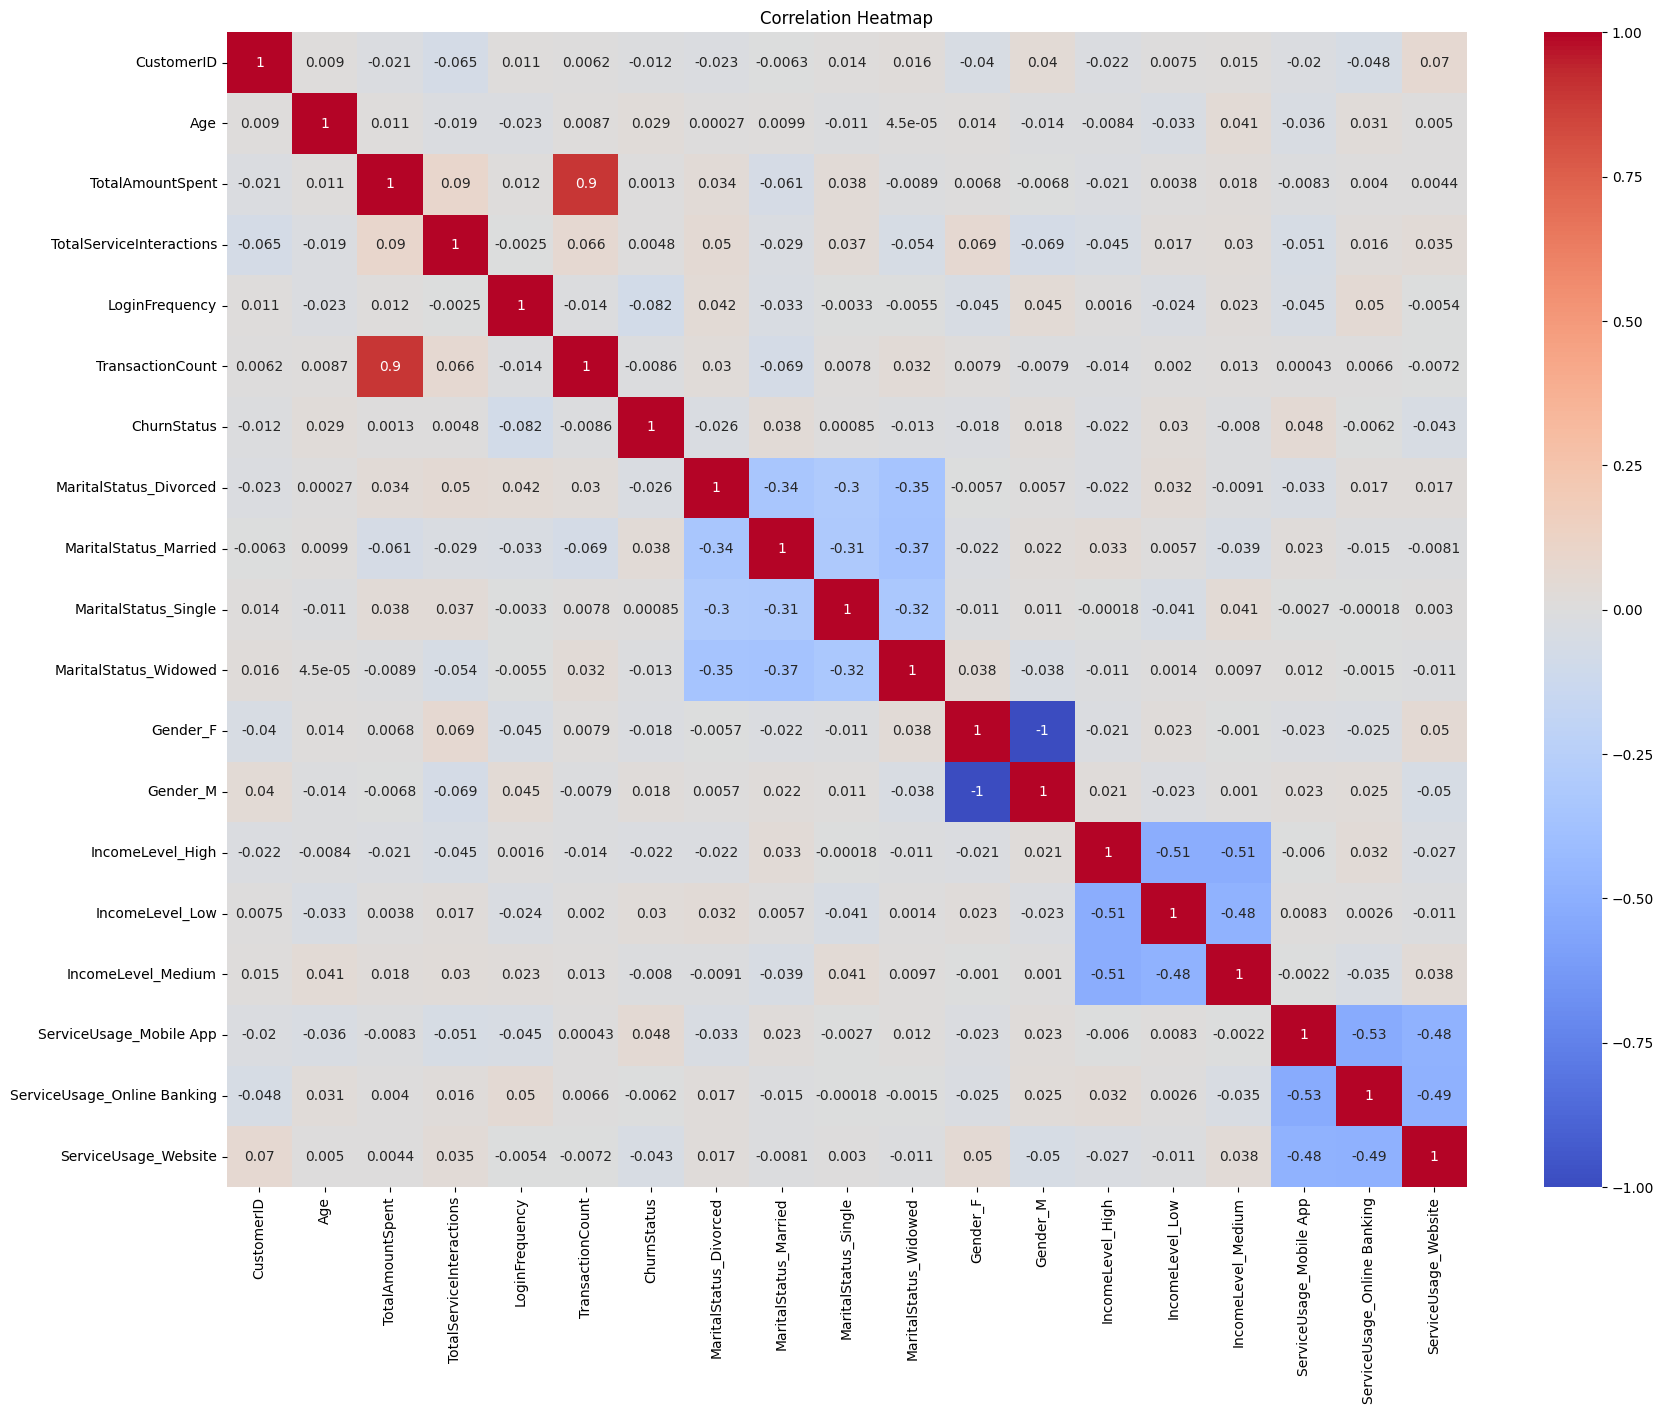

In [97]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [98]:
df.to_csv('customer_churn_analysis_cleaned.csv', index=False)